# Evaluating Scene Recognition Classifier


In [1]:
## Uncomment the following block if the notebook does not run ##

# import sys
# import os

# # For one-level deep notebook
# BASE_DIR = os.path.abspath("../")
# if BASE_DIR not in sys.path:
#     sys.path = [BASE_DIR] + sys.path

In [2]:
import torch
import logging

from recognizer.data import ProjectDataset
from recognizer.utils.visualise import Visualise
from recognizer.model import ResNetFineTunedClassifier
from recognizer.trainer import TorchRunner
from recognizer.utils.types import EvalResults

In [3]:
# configuring logging level
logging.basicConfig(level=logging.INFO)
# picking appropriate device to train the model
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
# dataset related config
datasets_dir = "../data"
training_dataset = f"{datasets_dir}/train"
testing_dataset = f"{datasets_dir}/test"
DEBUG_MODE = False

In [4]:
train_loader, val_loader, test_loader = ProjectDataset.get_loaders()

In [5]:
if DEBUG_MODE:
    Visualise.display_sample_per_class(test_loader)

In [6]:
classifier = ResNetFineTunedClassifier()
classifier.load("../checkpoints/models/21.safetensors")
TorchRunner.get_summary(classifier, (3, 244, 244))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 122, 122]           9,408
       BatchNorm2d-2         [-1, 64, 122, 122]             128
              ReLU-3         [-1, 64, 122, 122]               0
         MaxPool2d-4           [-1, 64, 61, 61]               0
            Conv2d-5           [-1, 64, 61, 61]          36,864
       BatchNorm2d-6           [-1, 64, 61, 61]             128
              ReLU-7           [-1, 64, 61, 61]               0
            Conv2d-8           [-1, 64, 61, 61]          36,864
       BatchNorm2d-9           [-1, 64, 61, 61]             128
             ReLU-10           [-1, 64, 61, 61]               0
       BasicBlock-11           [-1, 64, 61, 61]               0
           Conv2d-12           [-1, 64, 61, 61]          36,864
      BatchNorm2d-13           [-1, 64, 61, 61]             128
             ReLU-14           [-1, 64,

## Test


In [7]:
if DEBUG_MODE:
    _, _ = TorchRunner.test(
        loader=val_loader,
        model=classifier,
        loss_fn=torch.nn.functional.cross_entropy,
        device=device,
    )

test_results = TorchRunner.evaluate(
    loader=val_loader, model=classifier, k=5, device=device
)

INFO:recognizer.trainer:Top-1 accuracy: 70.58%	Top-5 accuracy: 92.66%


INFO:root:
Precision: 0.7180759004628183
Recall: 0.7047482591074521
F1: 0.7014621157434768


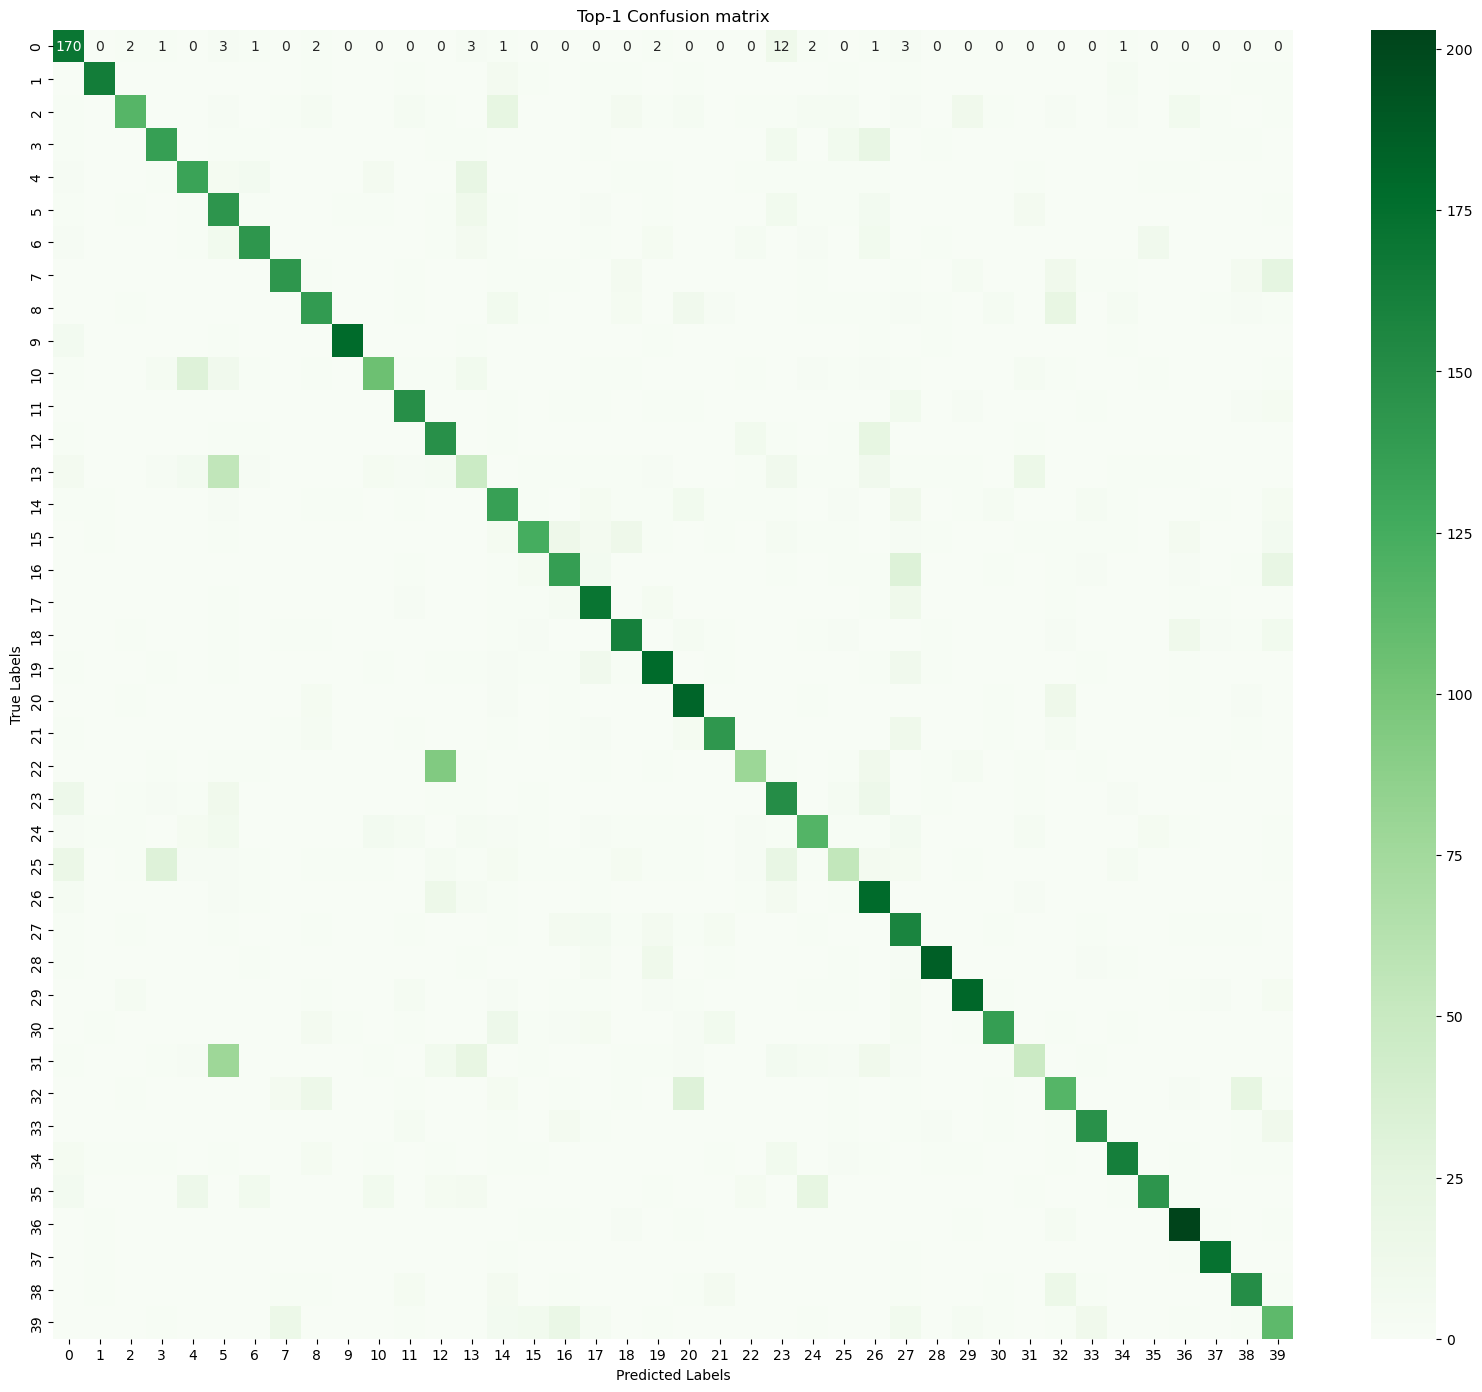

In [8]:
top_1_cm, top_1_precision, top_1_recall, top_1_f1 = test_results.compute_top_1_scores()
logging.info(f"\nPrecision: {top_1_precision}\nRecall: {top_1_recall}\nF1: {top_1_f1}")
Visualise.plot_confusion_matrix(top_1_cm, size=(20, 17), cmap="Greens")

INFO:root:
Precision: 0.9292675642596493
Recall: 0.9260231157160611
F1: 0.9265969377824606


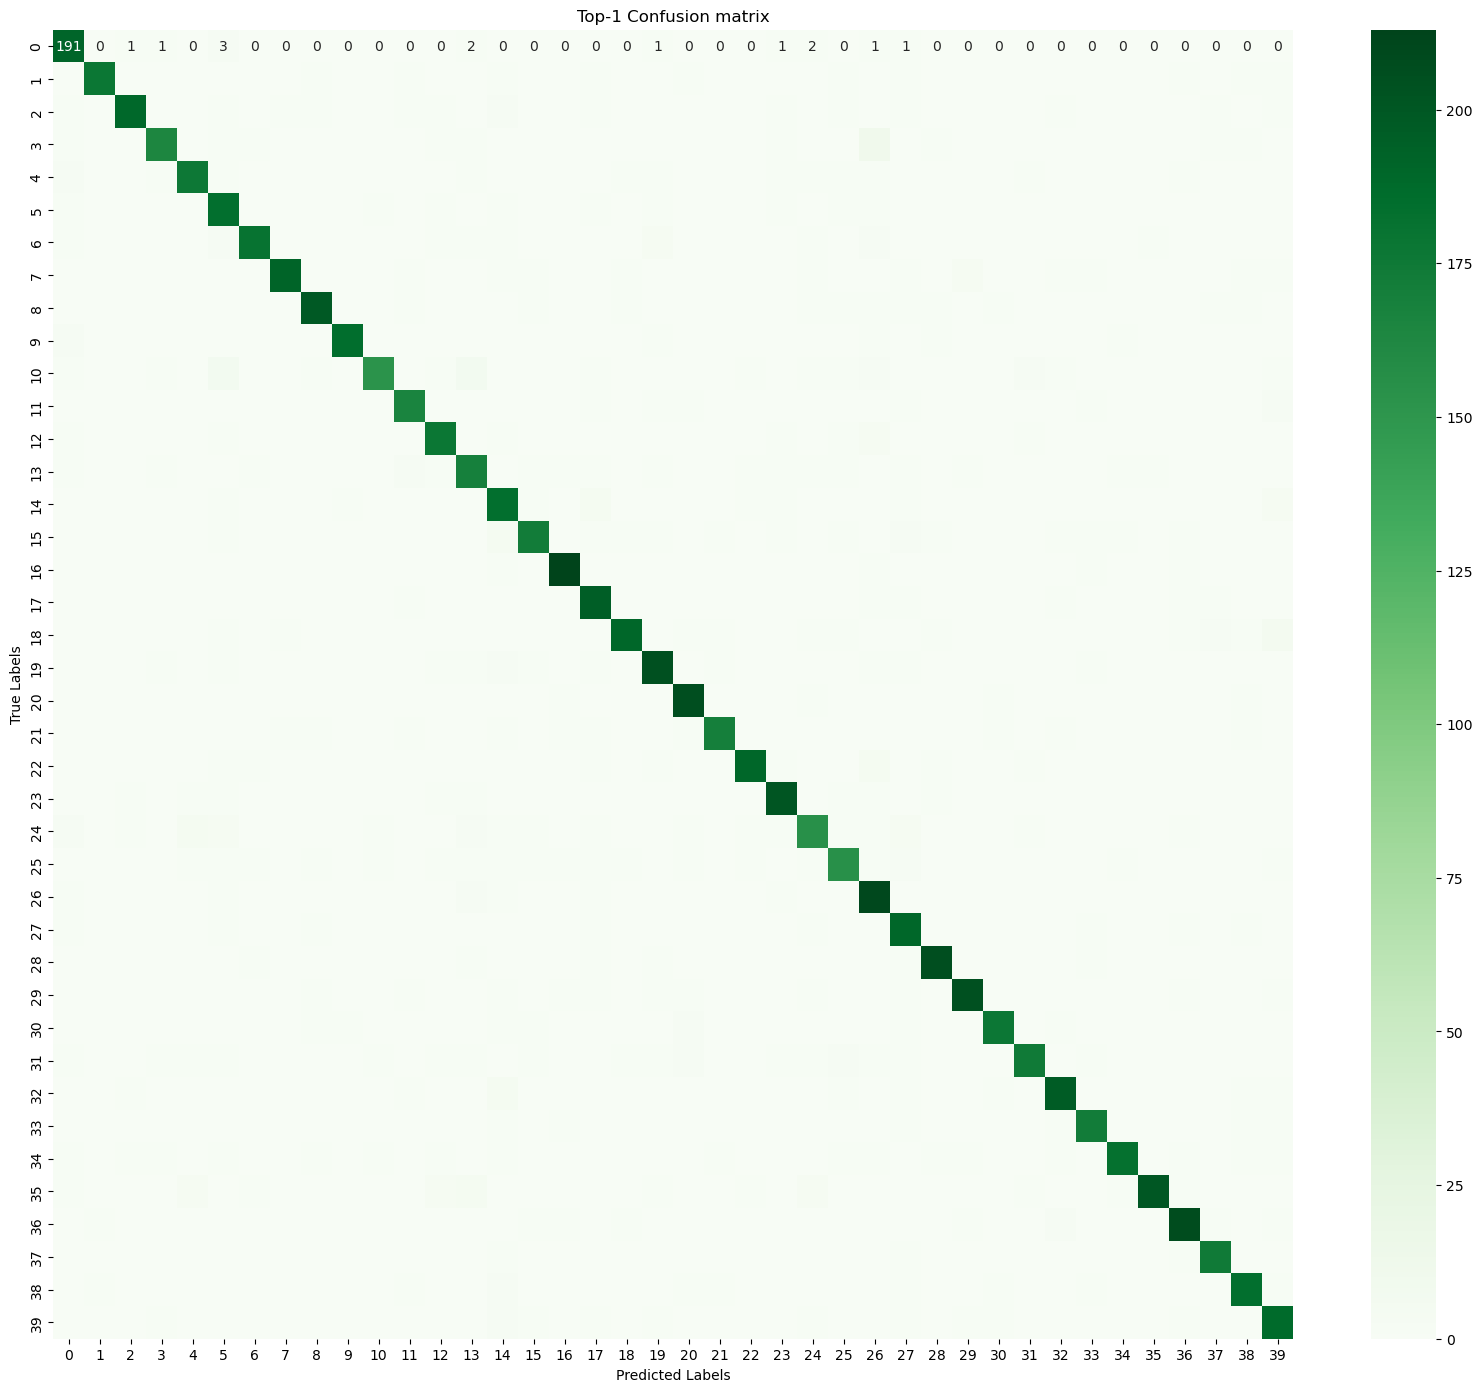

In [9]:
top_k_cm, top_k_precision, top_k_recall, top_k_f1 = test_results.compute_top_k_scores()
logging.info(f"\nPrecision: {top_k_precision}\nRecall: {top_k_recall}\nF1: {top_k_f1}")
Visualise.plot_confusion_matrix(top_k_cm, size=(20, 17), cmap="Greens")

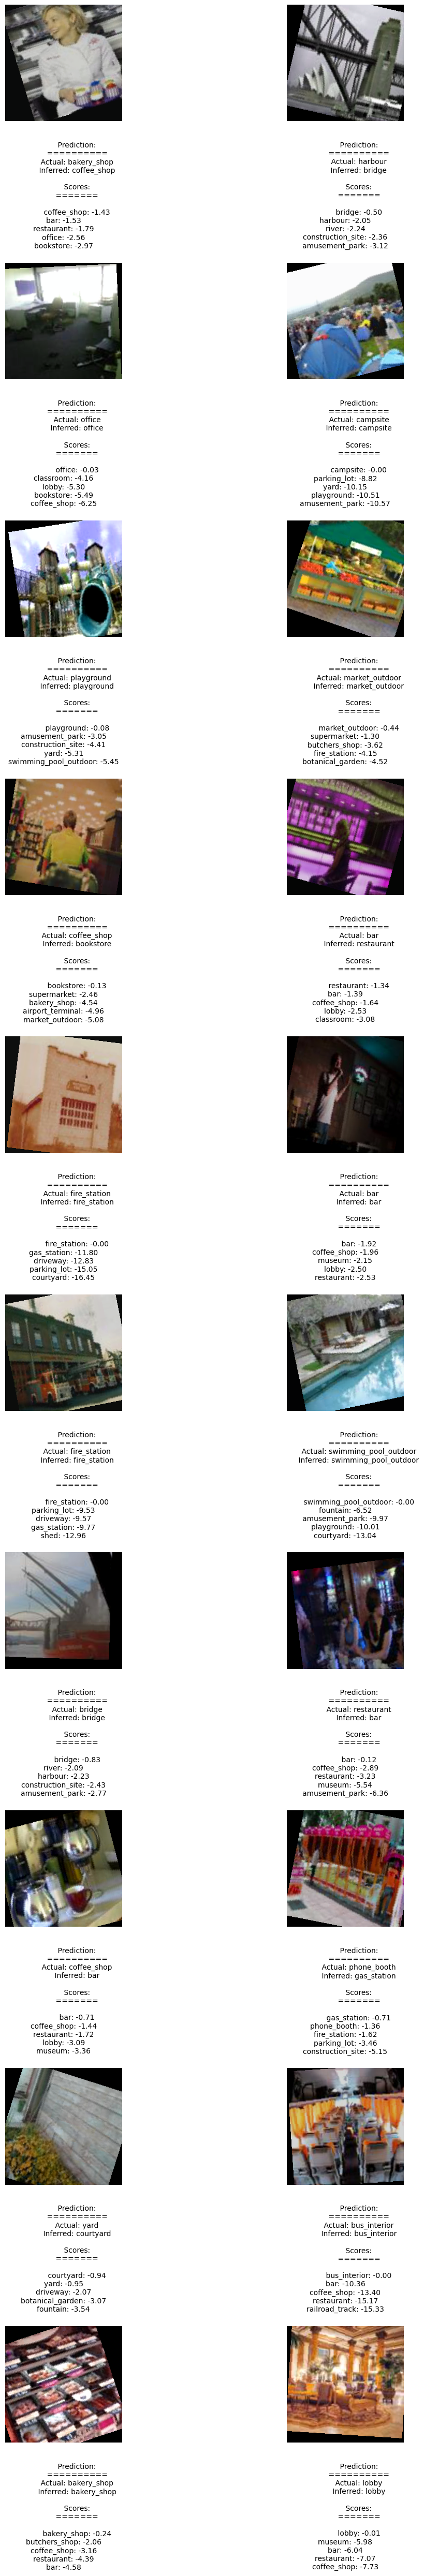

In [10]:
Visualise.show_results(eval_results=test_results, n=20)